<a id="section_toc"></a> 
## Tabla de Contenidos

[Consigna](#section_consigna)

[Integrantes](#section_members)

[Resumen](#section_resumen)

* Data sets:

[Dataset_Properati](#section_full_dataset)

[Dataset_CABA](#section_CABA)

[Dataset_BPC](#section_BPC)

[Dataset_Belgrano](#section_bel)


* Filtros:

[Columnas - 1er filtro](#section_col1)

[Columnas_ - agrupacion](#section_col2)

[Filtro - Apartments en USD](#section_ap_usd)

   
* Analisis descriptivo (EDA) y limpieza de variables:

[pre - limpieza](#section_EDA)

[price_usd_per_m2 - target: IQR 0.75q](#section_iqr)

[price_usd_per_m2 - target](#section_price_1000)

[missing_dependientes](#section_deteccion_faltantes)

[price_per_m2](#section_price2)

[surface_covered_in_m2](#section_surface)

[expenses](#section_exp)

[room](#section_room)

[missings - update](#section_miss2)

[expenses post room](#section_exp2)

[floor](#section_floor)

[lat lon](#section_lat_lon)

* Duplicados:
[duplicados](#section_duplicados)

Generacion de nuevas columnas:

* en base al data set original:
[nuevas_columnas](#section_nuevas)

* en base a data externa: 
[data externa](#section_externa)

[post - limpieza/ ANTES y DESPUES](#section_despues)

[volver a TOC](#section_toc)



<a id="section_consigna"></a> 
## Consigna

[volver a TOC](#section_toc)

**Properati. Workshop 1**

y = precio por metro cuadrado de una propiedad en USD

El dataset de Properati es de tamaño entre pequeño y mediano, pero tiene dos complejidades a las que
deberá prestarle atención:
* Peso de missing data en algunas variables relevantes.
* Será importante tener en cuenta el problema de la influencia espacial en los precios
por metro cuadrado. En efecto, es probable que existan diferencias importantes de
en las diferentes geografías, barrios y zonas analizadas.


Objetivos:
* Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar
estrategias para lidiar con los datos perdidos en ciertas variables.
* Realizar un análisis descriptivo de las principales variables.
* Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import requests
sns.set() #par que es?


In [2]:
%matplotlib inline

<a id="section_members"></a> 
## Integrantes

[volver a TOC](#section_toc)

**Grupo 2**

Bruno Minnozzi

Carla Squillace

Daniel Eduardo Muñiz

Lucas Ibañez

<a id="section_resumen"></a> 
## Resumen

[volver a TOC](#section_toc)




* De la base de datos de **Properati** decidimos tomar un barrio de CABA para analizar. **Belgrano** tiene mayor cantidad de datos.


* Descartamos las columnas no utiles a primera vista, filtramos por las mas relevantes 


* Clasificamos/agrupamos las variables en cuantitativas/cualitativas y target/features



* Filtramos por **apartamentos/departamentos en USD**. El 84% de todos los datos están expresados en USD y 91% de las propiedades son departamentos. 


* Observamos alto porcentaje de missings y aparentes valores outliers. Primero nos focalizamos en la variable dependiente. Luego tratamos a las variables dependientes/features por grupos de analisis.


* Para la variable target **price_usd_per_m2**:

     * Evaluamos outliers con IQR 0.75, pero resukto excesivo y optamos por eliminar missing y poner un limite superior,
     
     * Missing. Consideramos que imputar los valores missing de la variable target price_usd_per_m2 podria afectar nuestro data set y luego afectar nuestro futuro modelo de prediccion. Por lo que optamos por eliminarlos dado que no se pierden tantos registros. Son 0,9 %.
     
     * Outliers. Analizamos datos de la pagina web de la competencia de Properati. Al observar los precios en dolares por metro cuadrado en Belgrano segun la data de Zonaprop encontramos propiedades superiores a 7000 USD/m2. Al analizar los graficos, optamos por un limite superior de 10.000 USD/m2.

* **surface_covered_in_m2** :

    * Evaluamos un IQR LS 0.90q y resulto razonable al mejorar la distribucion y perder pocos registros. 
    
    * Asimismo, de acuerdo a la legislacion de la CABA, un departamento se considera como tal a partir de los 18m2. Por lo tanto aplicamos este valor como limite inferior.
    
    * Estos limites y dropping de missing resultaron coherentes dado qye generaron solo la eliminacion de 0,6% registros sobre el total.
    
    * Al limpiar esta variable, los missing de **price_per_m2** tambien limpiaron 

* **rooms** :

    * Dado que no tenemos muchas observaciones de apartamentos de 5 6 7 y 8 cuartos - 69 observaciones en total - restringimos el analisis. Nos concentramos en departamentos de 1 2 3 y 4 cuartos donde hay minimo dos veces y media mas de datos. De esta forma, solo estamos perdiendo 69 registros.
    
    * La gran cantidad de missing - 1017 -  los imputamos, no con la moda, sino con una combinacion de la moda y el siguiente valor mas frecuente. Utilizamos una proporcion 0.55 para el valor 3 y 0.45 para el valor 4.
    
    * Al limpiar esta variable, mejoraro la distribucion y missing de la variable **expensas**. 

* **expenses** :

    * Decidimos reemplazar los 1078 missing con la mediana de las expensas segun la cantidad de cuartos de apartamento.
    
    * De acuerdo al histograma y box plot, decidimos eliminar outlier por encima de 40.000.

* **floor** :

    * Para que la variable floor sea utilizable deberiamos imputar 1616 valores de 1673 , es decir , 97% de los valores. Seria como "reinventar" la variable. Por lo que decicimos no usarla.

* **lat, lon** :

    * No tenemos claro como imputar los valores faltantes de latitud y longitud. Por lo que decidimos dejarlos. Y en caso de que el modelo a utilizar no permita nulos, los eliminaremos.
    
    
* Duplicados...


* Generacion de nuevas columnas:
   
    * En base a Properati: 
    
    * En base a data externa: GCABA


<a id="section_full_dataset"></a> 
## Dataset full

[volver a TOC](#section_toc)

In [3]:
df = pd.read_csv("properati.csv", index_col=0)

El dataset contiene información sobre todas las propiedades georeferenciadas de la base
de datos de la empresa. La información de cada propiedad que incluye es la siguiente:
* Fecha de creación
* Tipo de la propiedad (house, apartment, ph)
* Operación del aviso (sell, rent)
* Nombre del lugar
* Nombre del lugar + nombre de sus ‘padres’
* ID de geonames del lugar (si está disponible)
* Latitud,Longitud
* Precio original del aviso
* Moneda original del aviso (ARS, USD)
* Precio del aviso en moneda local (ARS)
* Precio aproximado en USD
* Superficie en m2
* Superficie cubierta en m2
* Precio en USD/m2
* Precio por m2
* N° de piso, si corresponde
* Ambientes
* URL en Properati
* Descripción
* Título
* URL de un thumbnail de la primer foto

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat-lon                     69670 non-null   object 
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

In [5]:
df.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [6]:
df.place_name.value_counts().head(10)

Córdoba          9254
Rosario          8504
Mar del Plata    6534
Tigre            3324
Nordelta         3315
Belgrano         2992
Palermo          2885
La Plata         2534
Caballito        2273
Pilar            2228
Name: place_name, dtype: int64

In [7]:
#print(df.shape)
print(df.columns)
#print(df.dtypes)

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')



<a id="section_CABA"></a> 
## CABA

[volver a TOC](#section_toc)

In [8]:
caba = df.loc[df.state_name == 'Capital Federal', :]
caba.head(3)
type(caba)
caba.state_name.value_counts()

Capital Federal    32316
Name: state_name, dtype: int64

In [9]:
caba.pivot_table(index=['place_name', 'rooms'], 
                                aggfunc={'rooms': 'count', 
                                         'price': ['mean', 'median', 'std'],
                                         'surface_covered_in_m2': ['mean', 'median', 'std']
                                         }
                                ).round(2)

price                      rooms  \
                             mean    median        std count   
place_name       rooms                                         
Abasto           1.0     66583.33   62000.0   16597.96    12   
                 2.0     93241.67   79450.0   32499.50    12   
                 3.0    144352.94  139500.0   41936.99    17   
                 4.0    154375.00  160000.0   13146.84    17   
                 5.0    234633.33  244000.0   26235.54     3   
...                           ...       ...        ...   ...   
Villa del Parque 4.0    251179.07  223000.0  100646.70    44   
                 5.0    492500.00  520000.0  161941.35     4   
                 6.0    413333.33  370000.0   92915.73     4   
                 7.0    320000.00  320000.0       0.00     3   
                 8.0    435000.00  435000.0   91923.88     2   

                       surface_covered_in_m2                 
                                        mean median     std  
place_name       rooms                                       
Abasto           1.0                   33.27   30.0    7.82  
                 2.0                   41.25   42.5    8.21  
                 3.0                   71.25   67.5   19.36  
                 4.0                   35.00    5.0   33.50  
                 5.0                  119.67  104.0   36.14  
...                                      ...    ...     ...  
Villa del Parque 4.0                  100.56   93.0   45.34  
                 5.0                  159.75  192.5   98.83  
                 6.0                  163.50  112.0  185.82  
                 7.0                  377.33  481.0  179.56  
                 8.0                   20.00   20.0    0.00  

[468 rows x 7 columns]


<a id="section_BPC"></a> 
## Belgrano, Palermo y Caballito

[volver a TOC](#section_toc)


Tomamos como muestra los barrios de Belgrano, Palermo y Caballito. 
Dentro de CABA, son los barrios con mayor datos disponibles.
Asimismo, no poseeen niveles socioeconomicos extremadamente disimiles. 

In [10]:
# 3 barrios
df_barrios = caba[(caba['place_name'] == 'Belgrano') | (caba['place_name'] == 'Palermo') | (caba['place_name'] == 'Caballito')]
df_barrios.head(5)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
19,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",-34.580504,-58.405874,...,96.0,3365.384615,3645.833333,NaN,3.0,NaN,http://www.properati.com.ar/15bq8_venta_depart...,Excelente semipiso al contra frente en Bulnes ...,"Bulnes y Libertador: espectacular pulmón, con ...",https://thumbs4.properati.com/8/1y9fKHLee-aQQj...
21,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.590926,-58.4116653",-34.590926,-58.411665,...,73.0,2292.372881,3705.479452,NaN,4.0,NaN,http://www.properati.com.ar/15bqd_venta_depart...,"EXCELENTE ZONA, MULTIPLES MEDIOS DE TRANSPORTE...",Departamento de 4 ambientes en Venta en Palermo,https://thumbs4.properati.com/0/P6wPIXB1wJFLVU...
52,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,"-34.6222111,-58.4391283",-34.622211,-58.439128,...,50.0,2200.000000,2200.000000,NaN,3.0,NaN,http://www.properati.com.ar/15buk_venta_depart...,Departamento de 3 Ambientes al Contrafrente. S...,CABALLITO 3 AMB. EN VENTA Listo para escriturar,https://thumbs4.properati.com/7/eXZg2k6Uq2w8KB...


In [11]:
df_barrios.place_name.value_counts()

Belgrano     2992
Palermo      2885
Caballito    2273
Name: place_name, dtype: int64

<a id="section_bel"></a> 
## Belgrano

[volver a TOC](#section_toc)

In [12]:
belgrano = df.loc[df.place_name == 'Belgrano', : ]

belgrano.shape

(2992, 25)



<a id="section_col1"></a> 
## Columnas 1

[volver a TOC](#section_toc)

Conclusion de primer filtro de columnas no utiles:

* 'operation. todo el dataset tiene valor 'sell'
* 'place_with_parent_names' esta pais|estad|barrio todo junto. Ya tenemos esta informacion en place_name en barrio
* 'country_name' esta Argentina solo
* 'image_thumbnail' no util para predecir
* 'lat-lon' repetido, ya esta lat y long.

* geomname_id no util
* properati_url no util


In [13]:
#Primer filtro
desired_col= ['property_type', 'place_name', 'state_name', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title']
#, 'geonames_id' and , 'properati_url'

belgrano= belgrano[desired_col]

<a id="section_col2"></a> 
## Agrupacion columnas

Agrupacion columnas para graficarlas mas facilmente.

[volver a TOC](#section_toc)

In [14]:

#Columnas de precio
price = ["price", "currency", "price_aprox_local_currency", "price_aprox_usd", "price_usd_per_m2", "price_per_m2"]
price.remove("currency")
#price= df_barrios[price_col]

#quant
quantitative = [f for f in belgrano.columns if belgrano.dtypes[f] != 'object']
#quantitative.remove('geonames_id')
quantitative.remove("price")
quantitative.remove("price_aprox_local_currency")
quantitative.remove("price_aprox_usd")
quantitative.remove("price_usd_per_m2")
quantitative.remove("price_per_m2")

#qual
qualitative = [f for f in belgrano.columns if belgrano.dtypes[f] == 'object']
#qualitative.remove("currency")
#qualitative.remove("properati_url")

In [15]:
print(quantitative)
print(qualitative)
print(price)

['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'expenses']
['property_type', 'place_name', 'state_name', 'currency', 'description', 'title']
['price', 'price_aprox_local_currency', 'price_aprox_usd', 'price_usd_per_m2', 'price_per_m2']


<a id="section_ap_usd"></a> 
## Apartments in USD

[volver a TOC](#section_toc)

Creamos un nuevo dataframe (df): 

*   sin tener en cuenta los datos (de precio) expresados unicamente en ARS. El 84% de todos los datos están expresados en USD.
*   Seleccionamos los datos sean solo departamentos (apartments) para nuestro analisis, dado que comprende un 91% de las propiedades.

In [16]:
belgrano.currency.value_counts() #Verificamos cuantos valores estan expresados en pesos argentinos

USD    2394
ARS     140
Name: currency, dtype: int64

In [17]:
usd = belgrano.loc[belgrano.currency == "USD",['currency']]
belgrano.shape[0]

2992

In [18]:
belgrano['property_type'].value_counts()

apartment    2761
house         121
store          67
PH             43
Name: property_type, dtype: int64

In [19]:
z = (6877/8150)*100
y = (7439/8150)*100
print(z,y)

84.38036809815951 91.2760736196319


In [20]:
belgrano = belgrano[belgrano['currency'] != 'ARS'] 
#Creamos un nuevo df sin tener en cuenta los datos con ARS, el 84% estan expresados en USD.
belgrano = belgrano[belgrano['property_type'] == 'apartment']
#Seleccionamos los datos sean solo departamentos para nuestro analisis, dado que comprende un 91% de las propiedades.
#df_barrios_usd_apto.isnull().sum() / df_barrios_usd_apto.shape[0] *100

In [21]:
missing_df = belgrano.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df_barrios.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]

,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,state_name,0,0.000000
3,lat,924,0.113374
4,lon,924,0.113374
5,price,423,0.051902
6,currency,423,0.051902
7,price_aprox_local_currency,423,0.051902
8,price_aprox_usd,423,0.051902
9,surface_total_in_m2,355,0.043558


In [22]:
belgrano.shape

(2624, 18)

El df bel_usd_apt tiene 2624 registros y la variable price_usd_per_m2 tiene 763 valores missing.

<a id="section_EDA"></a> 
## Analisis descriptivo pre limpieza

[volver a TOC](#section_toc)

In [23]:
sns.set_style("white")  

<AxesSubplot:title={'center':'Normal'}, xlabel='price_usd_per_m2'>

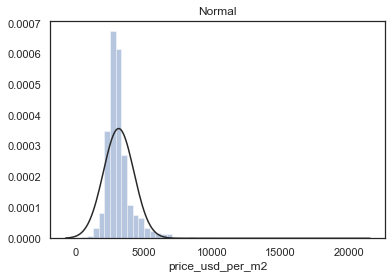

In [24]:
import scipy.stats as st #falta trabajar la dependiente!

y = belgrano ['price_usd_per_m2']
#plt.figure(1); plt.title('Johnson SU')
#sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
#plt.figure(3); plt.title('Log Normal')
#sns.distplot(y, kde=False, fit=st.lognorm)

<AxesSubplot:xlabel='price_usd_per_m2'>

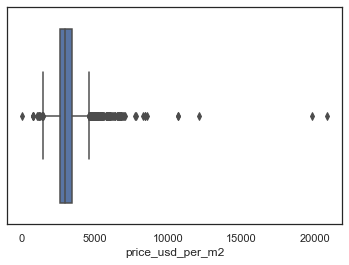

In [25]:
sns.boxplot(belgrano['price_usd_per_m2'])

Analisamos los outliers de price_usd_per_m2

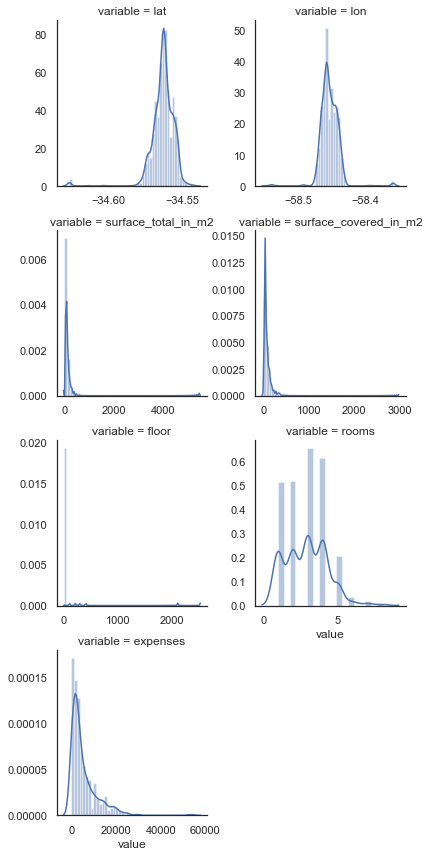

In [26]:
f = pd.melt(belgrano, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Tenemos que sacar los outliers

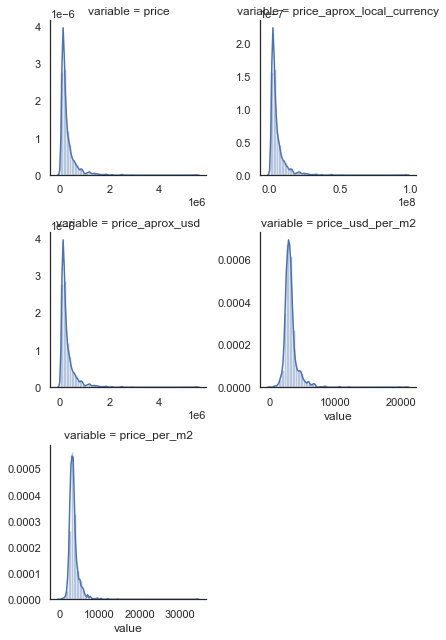

In [27]:
f = pd.melt(belgrano, value_vars=price)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Tenemos que analizar los outliers

<AxesSubplot:>

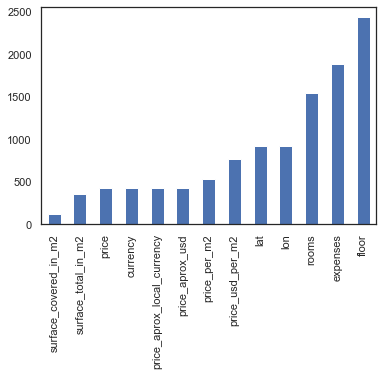

In [28]:
missing = belgrano.isnull().sum()  #palermo
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()


In [29]:
missing_df = belgrano.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df_barrios.shape[0]
missing_df#.ix[missing_df['missing_ratio'

,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,state_name,0,0.000000
3,lat,924,0.113374
4,lon,924,0.113374
5,price,423,0.051902
6,currency,423,0.051902
7,price_aprox_local_currency,423,0.051902
8,price_aprox_usd,423,0.051902
9,surface_total_in_m2,355,0.043558


Queremos limpiar el data set para eliminar outliers y reducir o eliminar los missing values.

<a id="section_iqr"></a> 
## price_usd_per_m2: IQR 0.75q

[volver a TOC](#section_toc)

Evaluamos esta posibilidad, pero conluimos en no aplicarla. 

Miramos la actual distribucion dela variables dependiente price_usd_per_m2:

<AxesSubplot:title={'center':'Normal'}, xlabel='price_usd_per_m2'>

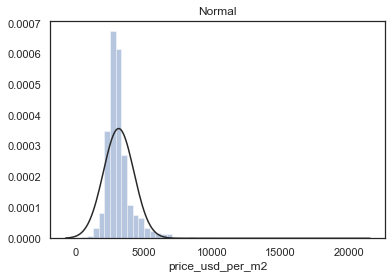

In [30]:
import scipy.stats as st #falta trabajar la dependiente!

y = belgrano['price_usd_per_m2']
#plt.figure(1); plt.title('Johnson SU')
#sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

<AxesSubplot:xlabel='price_usd_per_m2'>

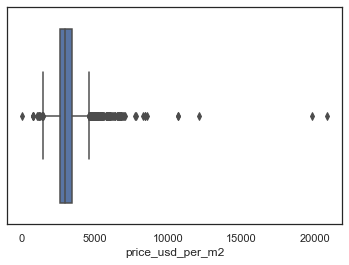

In [31]:
sns.boxplot(belgrano['price_usd_per_m2'])

In [32]:
1861 + 763 #La suma de los valores de price_usd_per_m2 y sus missing da el total de registros

2624

In [33]:
belgrano['price_usd_per_m2'].describe()

count     1861.000000
mean      3167.181046
std       1115.841775
min         31.369688
25%       2611.464968
50%       2975.000000
75%       3393.939394
max      20833.333333
Name: price_usd_per_m2, dtype: float64

Evaluamos la posibilidad de eliminar outliers con quantile 0.75:

In [34]:
#Defino el rango intercuartil para observar el limite superior
IQR_b_ppm2 = belgrano['price_usd_per_m2'].quantile(0.75) - belgrano['price_usd_per_m2'].quantile(0.25)
LS_b_ppm2 = belgrano['price_usd_per_m2'].quantile(0.75) + 1.5*IQR_b_ppm2
print("El limite superior es :", round(LS_b_ppm2,2))

El limite superior es : 4567.65


<AxesSubplot:title={'center':'Distribucion de precio por m2 en USD'}, xlabel='price_usd_per_m2'>

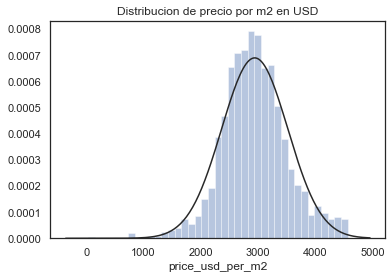

In [35]:
y_b_ppm2 = belgrano[belgrano['price_usd_per_m2']<= LS_b_ppm2]['price_usd_per_m2']
plt.figure(2); plt.title('Distribucion de precio por m2 en USD')
sns.distplot(y_b_ppm2, kde=False, fit=st.norm)

<AxesSubplot:xlabel='price_usd_per_m2'>

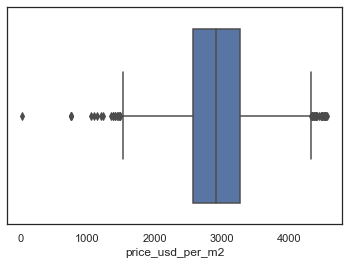

In [36]:
sns.boxplot(y_b_ppm2) #Ahora solo quedan los outliers de la izquierda

In [37]:
#IQR_b_ppm2 = bel_usd_apt['price_usd_per_m2'].quantile(0.75) - bel_usd_apt['price_usd_per_m2'].quantile(0.25)
LI_b_ppm2 = belgrano['price_usd_per_m2'].quantile(0.75) - 1.5*IQR_b_ppm2
print("El limite inferior es :", round(LI_b_ppm2,2))

El limite inferior es : 2220.23


<AxesSubplot:title={'center':'Distribucion de precio por m2 en USD'}, xlabel='price_usd_per_m2'>

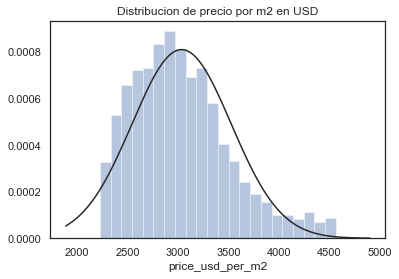

In [38]:
y_b_ppm2_2 = belgrano[(belgrano['price_usd_per_m2']>= LI_b_ppm2)&(belgrano['price_usd_per_m2']<= LS_b_ppm2)]['price_usd_per_m2']
plt.figure(2); plt.title('Distribucion de precio por m2 en USD')
sns.distplot(y_b_ppm2_2, kde=False, fit=st.norm)

<AxesSubplot:xlabel='price_usd_per_m2'>

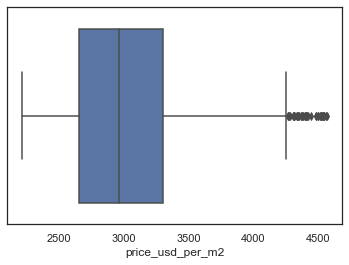

In [39]:
sns.boxplot(y_b_ppm2_2)

En el caso que usaramos quantile 0.75 para eliminar outliers de price_usd_per_m2 obtendriamos  una distribucion no tan disimil a la gausiana, y el box plot muestra muchos menos outliers. Sin embargo, los limites LS y LI pareceria que pueden eliminar muchos registros.

Procedemos a analisar cuantos son los datos que descartamos cuando quitamos los outliers en base a LS Y LI usando quantile 0.75.

In [40]:
belgrano.shape

(2624, 18)

In [41]:
bel_LS = belgrano[belgrano['price_usd_per_m2']<= LS_b_ppm2]
print(bel_LS.shape)
bel_LS.head(2)

missing_df = bel_LS.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df_barrios.shape[0]
missing_df#

(1716, 18)


,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,state_name,0,0.000000
3,lat,476,0.058405
4,lon,476,0.058405
5,price,0,0.000000
6,currency,0,0.000000
7,price_aprox_local_currency,0,0.000000
8,price_aprox_usd,0,0.000000
9,surface_total_in_m2,0,0.000000


In [42]:
(1861 - 1716)/2624

0.055259146341463415

In [43]:
1861 - 1716

145

Si aplicamos el IQR LS a la variable target (price_usd_per_m2) :
* pros: la variable target ya no tiene missings
* cons: pero estamos quitando 145 filas/registros, 6% de los registros


In [44]:
bel_LS_LI = belgrano[(belgrano['price_usd_per_m2']>= LI_b_ppm2)&(belgrano['price_usd_per_m2']<= LS_b_ppm2)]
print(bel_LS_LI.shape)
bel_LS_LI.head(2)

missing_df = bel_LS_LI.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df_barrios.shape[0]
missing_df#

(1583, 18)


,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,state_name,0,0.000000
3,lat,446,0.054724
4,lon,446,0.054724
5,price,0,0.000000
6,currency,0,0.000000
7,price_aprox_local_currency,0,0.000000
8,price_aprox_usd,0,0.000000
9,surface_total_in_m2,0,0.000000


In [45]:
2624-763 #outliers de price_usd_per_m2

1861

In [46]:
(1861 - 1583)/2624


0.10594512195121951

In [47]:
1861 - 1583

278

Si aplicamos el IQR LS y LI a la variable target (price_usd_per_m2) :

* pros: la variable target ya no tiene missings
* cons: pero estamos quitando 278 filas/registros, 11% de los registros

In [48]:
belgrano['price_usd_per_m2'].describe()

count     1861.000000
mean      3167.181046
std       1115.841775
min         31.369688
25%       2611.464968
50%       2975.000000
75%       3393.939394
max      20833.333333
Name: price_usd_per_m2, dtype: float64

In [49]:
bel_LS['price_usd_per_m2'].describe()

count    1716.000000
mean     2942.673292
std       578.388009
min        31.369688
25%      2570.932540
50%      2913.043478
75%      3276.381303
max      4566.037736
Name: price_usd_per_m2, dtype: float64

In [50]:
bel_LS_LI['price_usd_per_m2'].describe()

count    1583.000000
mean     3034.386562
std       492.372443
min      2222.222222
25%      2659.549139
50%      2969.696970
75%      3302.863396
max      4566.037736
Name: price_usd_per_m2, dtype: float64

Si usaramos quantile 0.75 para eliminar outlier de la variable target perderiamos muchos registros. Por esto motivo, optaremos por evaluar otra forma de controlar los outliers de la variable target (price_usd_per_m2).

<a id="section_price_1000"></a> 
## price_usd_per_m2
* missing
* outliers

[volver a TOC](#section_toc)

**Missing**

Consideramos que imputar los valores missing de la variable target price_usd_per_m2 podria afectar nuestro data set y luego afectar nuestro futuro modelo de prediccion. Por lo que optamos por eliminarlos dado que no se pierden tantos registros. Son 763 registros ( 0,9 %).

**Outliers**

Analizamos datos de la pagina web de la competencia de Properati. Al observar los precios en dolares por metro cuadrado en Belgrano segun la data de Zonaprop encontramos propiedades superiores a 7000 USD/m2.

Por este motivo consideramos que el limite superior LS IQR 0.75q (4567.65), analizado en la seccion anteiror, es excesivo. Evaluamos y aplicamos un limite por juicio propio o limite por busines decision de 10.000 USD/m2.

<AxesSubplot:title={'center':'Distribucion de precio por m2 en USD'}, xlabel='price_usd_per_m2'>

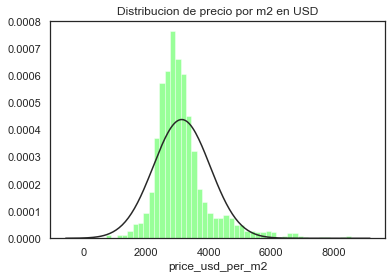

In [51]:
y_b_ppm3 = belgrano[belgrano['price_usd_per_m2']<= 10000]['price_usd_per_m2']
plt.figure(2); plt.title('Distribucion de precio por m2 en USD')
sns.distplot(y_b_ppm3, kde=False, fit=st.norm, color = "lime")

Obtenemos un distribucion no tan disimil a la gausiana. El grafico de box plot respalda el limite de 10.000 USD/m2.

<AxesSubplot:xlabel='price_usd_per_m2'>

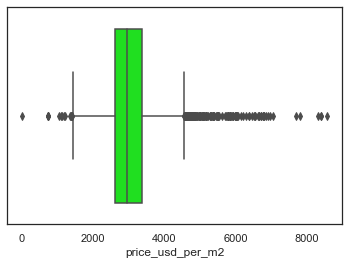

In [52]:
sns.boxplot(y_b_ppm3,  color = "lime")

In [53]:
#aplicamos el limite 10000 para la variable target price_usd_per_m2
#al mismo tiempo descartamos los missings de esa variable
#el nuevo data set solo usa los registros con price_usd_per_m2 no missing y menores a 10000 USD/m2
belgrano = belgrano[belgrano['price_usd_per_m2']<= 10000] 
belgrano['price_usd_per_m2'].describe()

count    1856.000000
mean     3135.835155
std       909.335428
min        31.369688
25%      2610.209627
50%      2972.200772
75%      3390.340052
max      8552.631579
Name: price_usd_per_m2, dtype: float64

In [54]:
1861-1856 #sacamos 5 datos solos

5

In [55]:
(1861-1856)/1861

0.0026867275658248252

In [56]:
belgrano['price_usd_per_m2'].isnull().sum() # al usar LS de 10000 ya no hay missings.

0

Evaluamos el criterio IQR (LS, LI)usando quantile 0.75 y entendemos que no es un criterio razonable y aplicable a esta variable y base de datos.

Alternativamente, al poner en practica como limite superior 10.000 USD/m2 en la variable price_usd_per_m2:
* eliminanos los 763 missing de la variable dependiente
* adicionalmente, solamente eliminamos 5 resgistros (0,03%) de la vble price_usd_per_m2
* los grafico de distribucion y box plot respaldan esta decision

Consideramos que imputar los valores missing de la variable target price_usd_per_m2 podria afectar nuestro data set y luego afectar nuestro futuro modelo de prediccion. Por lo que optamos por eliminarlos.

Conclusion:  Consideramos como limite superior 10.000 USD/m2 considerando el mercado local en este barrio.

<a id="section_deteccion_faltantes"></a> 
## Valores faltantes de variables dependientes

[volver a TOC](#section_toc)

In [57]:
missing_df = belgrano.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df_barrios.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]

,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,state_name,0,0.000000
3,lat,546,0.066994
4,lon,546,0.066994
5,price,0,0.000000
6,currency,0,0.000000
7,price_aprox_local_currency,0,0.000000
8,price_aprox_usd,0,0.000000
9,surface_total_in_m2,0,0.000000


<AxesSubplot:>

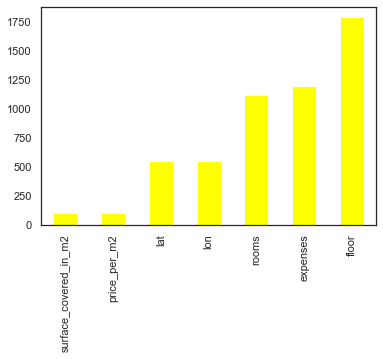

In [58]:
missing = belgrano.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='yellow')

Luego de haber tratado la variable target (price_usd_per_m2), vemos que las variables que tienen missing son las siguientes:
* A - price_per_m2, surface_covered_in_m2, 
* B - floor, rooms, expenses,
* C - lat, lon,

Vemos que podriamos agrupar estas siete variables en tres grupos A B y C teniendo en cuenta la cantidad de missing values y sus interrelaciones. Pensamos que cuando tratemos los missing de la variable de un grupo, por ejemplo surface_covered_in_m2, esta impactara en los missing de la otra variable de su grupo price_per_m2.

<a id="section_price2"></a> 
## price_per_m2
* estragia: dropna

[volver a TOC](#section_toc)

Evaluamos esta posibilidad, pero no la aplicamos:

In [59]:
belgrano.shape

(1856, 18)

In [60]:
bel_price2 = belgrano.dropna(subset=["price_per_m2"]) #dropna

In [61]:
bel_price2.shape

(1756, 18)

Si fuese necesario podriamos drop los valores faltantes de la variable dependiente price_per_m2, dado que son 100 registros unicamente.

Optamos por analisar primero surface_covered_in_m2 , ya que impacta en los missing de price_per_m2.

<a id="section_surface"></a> 
## surface_covered_in_m2

* outliers (IQR, businees)
* valores faltantes

[volver a TOC](#section_toc)

count    1756.000000
mean       83.486902
std        69.239601
min         5.000000
25%        40.000000
50%        57.000000
75%       103.000000
max       587.000000
Name: surface_covered_in_m2, dtype: float64


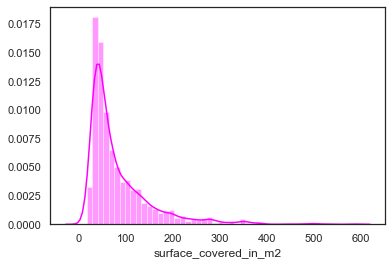

In [62]:
print(belgrano.surface_covered_in_m2.describe()) #Observamos los valores de surface covered
sns.distplot(belgrano['surface_covered_in_m2'], color = 'fuchsia')
plt.show()

Para analisar outliers para la variable surface_covered_in_m2, primero calculamos IQR.

Asimismo, de acuerdo a la legislacion de la CABA, un departamento se considera como tal a partir de los 18m2. Por lo tanto procedemos a aplicar este valor como limite inferior.

<AxesSubplot:xlabel='surface_covered_in_m2'>

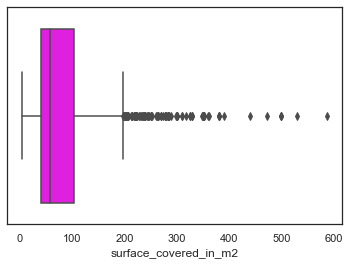

In [63]:
sns.boxplot(belgrano['surface_covered_in_m2'],  color = 'fuchsia')

In [64]:
print(belgrano.surface_covered_in_m2.describe()) #Observamos los valores de surface covered

count    1756.000000
mean       83.486902
std        69.239601
min         5.000000
25%        40.000000
50%        57.000000
75%       103.000000
max       587.000000
Name: surface_covered_in_m2, dtype: float64


Evaluamos un LS con quantile 0.75:

In [65]:
#Defino el rango intercuartil para observar el limite superior
IQR_s75 = belgrano['surface_covered_in_m2'].quantile(0.75) - belgrano['surface_covered_in_m2'].quantile(0.25)
LS_75 = belgrano['surface_covered_in_m2'].quantile(0.75) + 1.5*IQR_s75
print("El limite superior es :", round(LS_75,2))

El limite superior es : 197.5


Un LS con 0.95 quantil pareceria dejar muchas observaciones fuera. Probamos con 0.90.

In [66]:
#Defino el rango intercuartil para observar el limite superior
IQR_s = belgrano['surface_covered_in_m2'].quantile(0.90) - belgrano['surface_covered_in_m2'].quantile(0.25)
LS_s = belgrano['surface_covered_in_m2'].quantile(0.90) + 1.5*IQR_s
print("El limite superior para quantile(0.90) es: ", round(LS_s,2))

El limite superior para quantile(0.90) es:  361.25


In [67]:
belgrano.shape

(1856, 18)

In [68]:
belgrano['surface_covered_in_m2'].describe()

count    1756.000000
mean       83.486902
std        69.239601
min         5.000000
25%        40.000000
50%        57.000000
75%       103.000000
max       587.000000
Name: surface_covered_in_m2, dtype: float64

In [69]:
1856-1756 #La diferencia son los missings ente shape y describe de surface_covered_in_m2

100

In [70]:
belgrano = belgrano[belgrano['surface_covered_in_m2']<= LS_s]
print(belgrano.shape)
print(belgrano['surface_covered_in_m2'].describe())
#bel_LS_s.head(2)

(1744, 18)
count    1744.000000
mean       80.942661
std        62.024426
min         5.000000
25%        39.000000
50%        57.000000
75%       101.000000
max       361.000000
Name: surface_covered_in_m2, dtype: float64


In [71]:
1756-1744 #Un LS de 365 saca 12 valores, es decir 0,01% de los valores

12

count    1744.000000
mean       80.942661
std        62.024426
min         5.000000
25%        39.000000
50%        57.000000
75%       101.000000
max       361.000000
Name: surface_covered_in_m2, dtype: float64


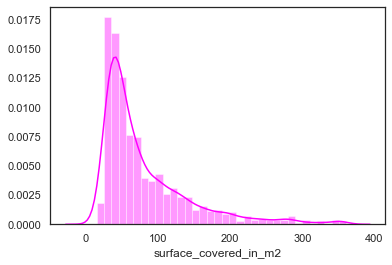

In [72]:
print(belgrano.surface_covered_in_m2.describe()) #Observamos los valores de surface covered
sns.distplot(belgrano['surface_covered_in_m2'],  color = 'fuchsia')
plt.show()

<AxesSubplot:xlabel='surface_covered_in_m2'>

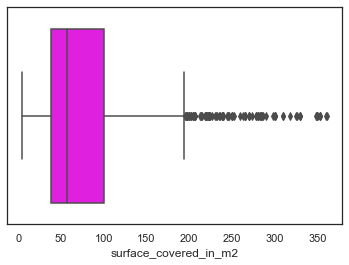

In [73]:
sns.boxplot(belgrano['surface_covered_in_m2'],  color = 'fuchsia')

In [74]:
missing_df = belgrano.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df_barrios.shape[0]
missing_df# #no hay mas missings para surface

,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,state_name,0,0.000000
3,lat,486,0.059632
4,lon,486,0.059632
5,price,0,0.000000
6,currency,0,0.000000
7,price_aprox_local_currency,0,0.000000
8,price_aprox_usd,0,0.000000
9,surface_total_in_m2,0,0.000000


Si aplicamos el IQR LS quantile 0.90 a la variable surface_covered_in_m2 :

* eliminamos los missings, eran solo 100 registros
* estamos quitando 0,01%% de los registros adicional

Por lo que es un LS 0.90 conveniente.

Asimismo, de acuerdo a la legislacion de la CABA, un departamento se considera como tal a partir de los 18m2. Por lo tanto aplicamos este valor como limite inferior.

In [75]:
#como minimo un departamente tiene que tener 18 m cuadrados
belgrano = belgrano[belgrano['surface_covered_in_m2']>= 18]
belgrano['surface_covered_in_m2'].describe()


count    1743.000000
mean       80.986231
std        62.015524
min        19.000000
25%        39.000000
50%        57.000000
75%       101.000000
max       361.000000
Name: surface_covered_in_m2, dtype: float64

In [117]:
100 + 12 + 1

113

In [118]:
113/1856

0.06088362068965517

Se puede ver el minimo de 18m2 en la variable surface_covered_in_m2. Con este LI, solo perdemos un registro.

Las variables que tienen missing son lat, lon, floor, rooms,expenses.

<a id="section_exp"></a> 
## expenses

[volver a TOC](#section_toc)

Al ver expenses, decidimos trabajar primero con rooms.

count      619.000000
mean      5494.117932
std       5827.830909
min          1.000000
25%       1650.000000
50%       3388.000000
75%       7450.000000
max      54240.000000
Name: expenses, dtype: float64


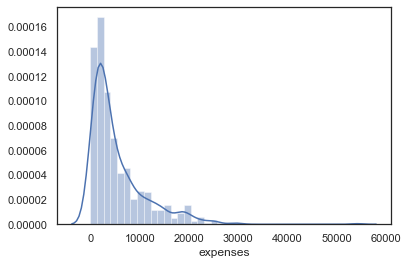

In [76]:
print(belgrano.expenses.describe()) 
sns.distplot(belgrano['expenses'])
plt.show()

In [77]:
sns.set_style("darkgrid")

<AxesSubplot:xlabel='expenses'>

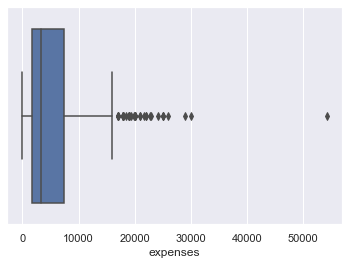

In [78]:
sns.boxplot(belgrano['expenses'])

De acuerdo al histograma y box plot, vemos que habria outliers por encima de los 35.000 aproximadamente.

In [79]:
belgrano.groupby(['expenses'])['surface_covered_in_m2'].median() #esto es coherente.

expenses
1.0         34.5
250.0       38.0
300.0       33.0
500.0       32.5
590.0       67.0
           ...  
25000.0    284.0
25900.0    278.0
29000.0    245.0
30000.0    172.0
54240.0     83.0
Name: surface_covered_in_m2, Length: 194, dtype: float64

In [80]:
belgrano.groupby(['rooms'])['expenses'].median()

rooms
1.0     2600.0
2.0     1900.0
3.0     3230.0
4.0     7000.0
5.0    14000.0
6.0     3700.0
7.0        NaN
8.0        NaN
Name: expenses, dtype: float64

Asimismo al observar las expensas en relacion a los cuartos vemos que:
* los missing se agrupan en las propiedades que tienen mas de 7 y 8 cuartos.
* podria haber un dato erroneo de expensas en los apartamentos de :
    - 5 cuartos, dado que la mediana se dispara
    - 6 cuartos, dado que la mediana es menor a los de menos cuartos

Por este motivo, primero trataremos la variable room, y luego volveremos a expensas.

<a id="section_room"></a> 
## room

[volver a TOC](#section_toc)

In [81]:
def count_plotter(data, label, labelsize=12):    
    sns.set(rc={"figure.figsize": (10, 7), 
                "xtick.labelsize": labelsize})
    sns.set_style("white")    
    data_count = sns.countplot(data)
    data_count.set_title('Histograma de ' + label + '\n', fontsize=16)

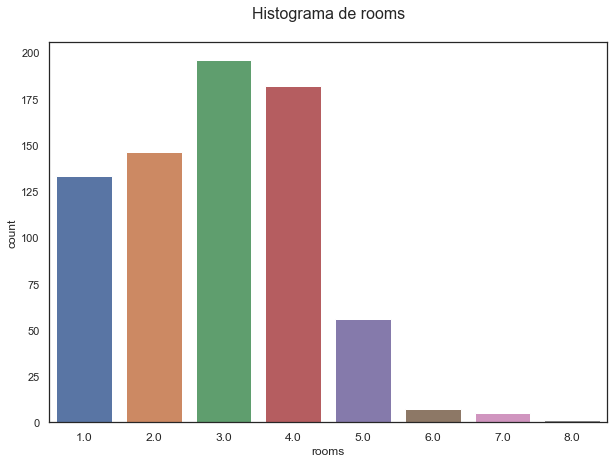

In [82]:
count_plotter(belgrano.rooms, "rooms")

In [83]:
print(belgrano.rooms.mode()) #La moda son 3 cuartos
belgrano.rooms.value_counts() #no tenemos muchas observaciones a partir de 5 cuartos

0    3.0
dtype: float64


3.0    196
4.0    182
2.0    146
1.0    133
5.0     56
6.0      7
7.0      5
8.0      1
Name: rooms, dtype: int64

In [119]:
133/56

2.375

In [84]:
belgrano.groupby(['rooms'])['price_usd_per_m2'].median() #no hay tanto cambio de precio

rooms
1.0    3010.810811
2.0    2851.122309
3.0    2846.688034
4.0    2868.852459
5.0    3021.739130
6.0    2744.360902
7.0    2094.017094
8.0    4310.344828
Name: price_usd_per_m2, dtype: float64

In [85]:
56+7+5+1 #registros que se pierden si no squedamos con 1 2 3 4 cuartos

69

Dado que no tenemos muchas observaciones de apartamentos de 5 6 7 y 8 cuartos, restringimos el analisis. Nos concentramos en departamentos de 1 2 3 o 4 cuartos. De esta forma, solo estamos perdiendo 69 registros.

Dropeamos las 69 rows que tienen 5 6 7 u 8 cuartos:

In [86]:
a = [5,6,7,8]

bel_rooms = belgrano[~belgrano['rooms'].isin(a)]

b = belgrano.shape[0] - bel_rooms.shape[0]
print("Registros eliminados", b )
bel_rooms.rooms.value_counts()


Registros eliminados 69


3.0    196
4.0    182
2.0    146
1.0    133
Name: rooms, dtype: int64

In [87]:
bel_rooms.rooms.isnull().sum()

1017

Asimismo, tenemos 1017 missing de la variable rooms que podemos reemplazar:
* con la moda:3
* con una proporcion 0.55 de 3 y 0.45 de 4, los mayores valores.
Optamos por la segunda opcion.

In [88]:
#Cantidad de nulos, 1 2 3 4 rooms:
cant_car_null = bel_rooms.rooms.isnull().sum()
print("# nulos en rooms: ",cant_car_null)

car_three_mask = bel_rooms.rooms == 3
cant_car_3 = car_three_mask.sum()
print("# 3 en rooms: ",cant_car_3)

car_four_mask = bel_rooms.rooms == 4
cant_car_4 = car_four_mask.sum()
print("# 4 en rooms: ",cant_car_4)

#print("# de rooms", cant_car_1+cant_car_2+cant_car_3+cant_car_4)

# nulos en rooms:  1017
# 3 en rooms:  196
# 4 en rooms:  182


In [89]:
print(bel_rooms.rooms.mode()) #La moda son 3 cuartos
bel_rooms.rooms.value_counts()

0    3.0
dtype: float64


3.0    196
4.0    182
2.0    146
1.0    133
Name: rooms, dtype: int64

In [90]:
# los registros que son null en Car:
data_car_null_mask = bel_rooms.rooms.isnull()
data_car_null = bel_rooms.loc[data_car_null_mask, :]
print(data_car_null.shape[0])


# una muestra del 45% de los registros calculados en el paso anterior:
data_car_null_mask_sample_1 = data_car_null.sample(frac = 0.45)


# los índices de ese 45%
data_car_null_ones_index = data_car_null_mask_sample_1.index
print(len(data_car_null_ones_index))



# los que van a ser rellenados con valor 2 son todos los que no fueron seleccionados en el paso anterior:
data_car_null_twos_index = data_car_null.index.difference(data_car_null_ones_index)
print(len(data_car_null_twos_index))

1017
458
559


In [91]:
bel_rooms.loc[data_car_null_ones_index, "rooms"] = 4
bel_rooms.loc[data_car_null_twos_index, "rooms"] = 3

/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [92]:
cant_car_null = bel_rooms.rooms.isnull().sum()
print(cant_car_null)

car_one_mask = bel_rooms.rooms == 4
cant_car_1 = car_one_mask.sum()
print(cant_car_1)

car_two_mask = bel_rooms.rooms == 3
cant_car_2 = car_two_mask.sum()
print(cant_car_2)


0
640
755


In [93]:
#Control 
e = 640-458
f = 755 - 559
print("cuatros", e)
print("tres", f)

cuatros 182
tres 196


In [94]:
bel_rooms.rooms.value_counts()

3.0    755
4.0    640
2.0    146
1.0    133
Name: rooms, dtype: int64

Ahora vemos que se incrementaron los valores de 3 y 4, y ya no tenemos missing de rooms.


<a id="section_miss2"></a> 
## Recuento de missing

[volver a TOC](#section_toc)

In [95]:
missing_df = bel_rooms.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df_barrios.shape[0]
missing_df# 

,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,state_name,0,0.000000
3,lat,485,0.059509
4,lon,485,0.059509
5,price,0,0.000000
6,currency,0,0.000000
7,price_aprox_local_currency,0,0.000000
8,price_aprox_usd,0,0.000000
9,surface_total_in_m2,0,0.000000


<a id="section_exp2"></a> 
## expenses (post-room)

[volver a TOC](#section_toc)

In [96]:
print("Missing de la variable expenses: ", bel_rooms['expenses'].isnull().sum())

Missing de la variable expenses:  1078


In [97]:
bel_rooms.groupby(['rooms'])['expenses'].median() #parece mas estable que mean

rooms
1.0    2600.0
2.0    1900.0
3.0    3200.0
4.0    3900.0
Name: expenses, dtype: float64

In [98]:
bel_rooms.groupby(['rooms'])['expenses'].mean()

rooms
1.0    2163.875000
2.0    2005.121212
3.0    5132.495082
4.0    5747.292000
Name: expenses, dtype: float64

Decidimos reemplazar los 1078 missing con la **mediana** de expensas segun la cantidad de cuartos del apartamento.  

In [99]:
bel_rooms['expenses'].fillna(bel_rooms.groupby(['place_name','rooms'])['expenses'].transform('median'),inplace=True)

/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [100]:
print("Missing de la variable expenses: ", bel_rooms['expenses'].isnull().sum())

Missing de la variable expenses:  0


count     1674.00000
mean      3934.53644
std       3481.18990
min          1.00000
25%       2600.00000
50%       3200.00000
75%       3900.00000
max      54240.00000
Name: expenses, dtype: float64


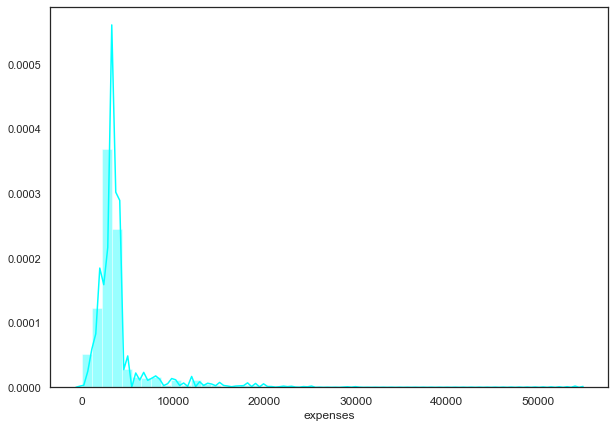

In [102]:
print(bel_rooms.expenses.describe()) 
sns.distplot(bel_rooms['expenses'],  color = 'aqua')
plt.show()

<AxesSubplot:xlabel='expenses'>

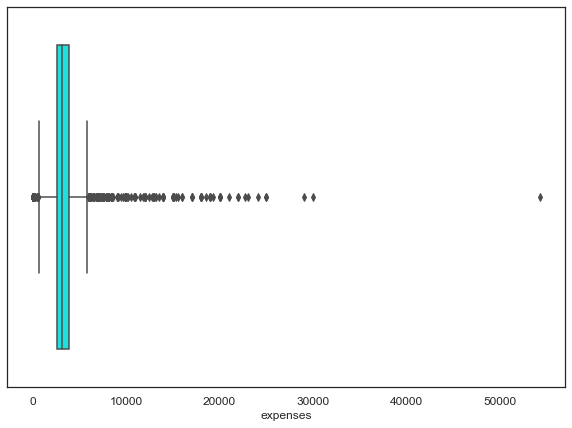

In [103]:
sns.boxplot(bel_rooms['expenses'], color = 'aqua')

De acuerdo al histograma y box plot, vemos que habria outliers por encima de los 35.000/40.000 aproximadamente.

In [104]:
bel_rooms.groupby(['expenses'])['surface_covered_in_m2'].median() 
#hay outliers incoherentes de grandes valores como 54240

expenses
1.0         34.5
250.0       38.0
300.0       33.0
500.0       32.5
590.0       67.0
           ...  
24126.0    300.0
25000.0    273.5
29000.0    245.0
30000.0    172.0
54240.0     83.0
Name: surface_covered_in_m2, Length: 189, dtype: float64

Aplicamos un LS de 40000.

In [105]:
bel_rooms = bel_rooms[bel_rooms['expenses']<= 40000]
#print(bel_exp)
bel_rooms['expenses'].describe()

count     1673.000000
mean      3904.467424
std       3257.527587
min          1.000000
25%       2600.000000
50%       3200.000000
75%       3900.000000
max      30000.000000
Name: expenses, dtype: float64

<a id="section_floor"></a> 
## floor

[volver a TOC](#section_toc)

In [106]:
bel_rooms.shape

(1673, 18)

In [107]:
bel_rooms.floor.isnull().sum()

1616

In [108]:
1616/1673

0.9659294680215182

In [109]:
bel_rooms.shape[0]-bel_rooms.floor.isnull().sum()

57

In [110]:
bel_rooms.floor.value_counts()

2.0     14
1.0      9
3.0      8
4.0      7
6.0      5
5.0      4
7.0      3
8.0      2
13.0     1
14.0     1
22.0     1
11.0     1
17.0     1
Name: floor, dtype: int64

Para que la variable floor sea utilizable deberiamos imputar 1616 valores de 1673 , es decir , 97% de los valores. Seria como "reinventar" la variable. Por lo que decicimos no usarla.

In [125]:
bel_floor = bel_rooms.drop(columns=['floor'])
bel_floor.shape

(1673, 17)

<a id="section_lat_lon"></a> 
## lat lon

[volver a TOC](#section_toc)

<Figure size 864x864 with 0 Axes>

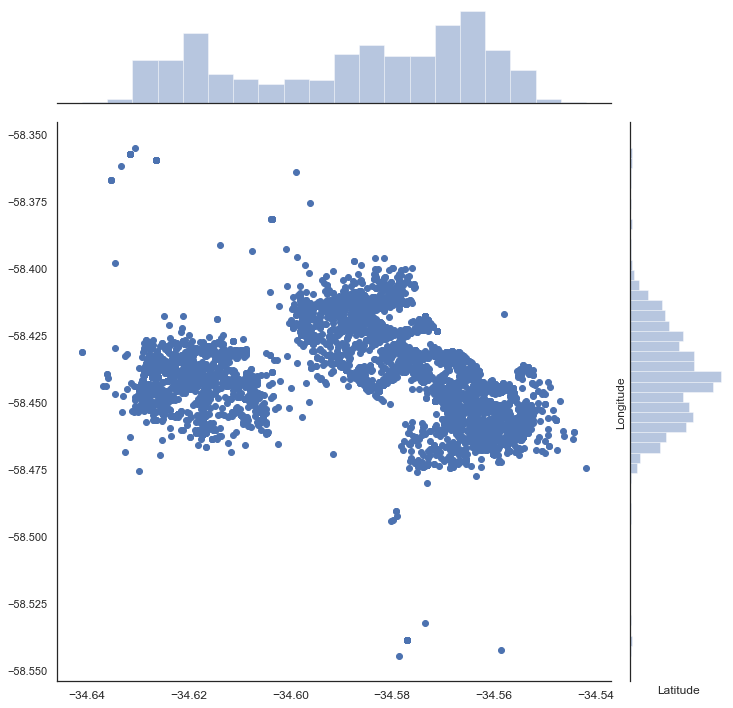

In [116]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df_barrios.lat.values, y=df_barrios.lon.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

No tenemos claro como imputar los valores faltantes de latitud y longitud. Por lo que decidimos dejarlos. Y en caso de que el modelo a utilizar no permita nulos, los eliminaremos.

In [126]:
bel_latlon = bel_floor.drop(columns=['lat', 'lon'])
bel_latlon.shape

(1673, 15)

<a id="section_duplicados"></a> 
## Duplicados

[volver a TOC](#section_toc)

In [127]:
duplicate = bel_latlon[bel_latlon.duplicated()] 
print("Duplicate Rows :")  
# Print the resultant Dataframe 
duplicate.shape

Duplicate Rows :


(18, 15)

Encontramos 18 filas repetidas. Las eliminamos.

In [128]:
bel_nodup = bel_latlon.drop_duplicates(keep="first")
print("tam con duplicados: ", bel_rooms.shape)
print("tam sin duplicados: ", bel_nodup.shape)

tam con duplicados:  (1673, 18)
tam sin duplicados:  (1655, 15)


<a id="section_nuevas"></a> 
## Nuevas columnas

[volver a TOC](#section_toc)

Nueva variable dummy: tiene espacio al aire libre

In [ ]:
#Dummy
bel_pm2_scm2_2 = bel_pm2_scm2 
mask_exterior = (bel_pm2_scm2_2['surface_total_in_m2'] - bel_pm2_scm2_2['surface_covered_in_m2']) > 0
dummies_exterior = pd.get_dummies(mask_exterior, prefix='Exterior', drop_first=True)
df_with_dummies = bel_pm2_scm2_2.join(dummies_exterior)
df_with_dummies.head(3)

Amenities: pileta, cochera, parrilla

In [ ]:
belgrano.description.value_counts()

In [ ]:
belgrano.title.value_counts()

<a id="section_externa"></a> 
## Data set externos

[volver a TOC](#section_toc)

**Data sets externos**

* Agreguen toda otra información construida a partir de los datos originales (o incluso información externa) que consideren relevante y útil para resolver los objetivos planteados.

In [ ]:
subte_data = "https://raw.githubusercontent.com/carlachka/grupo2dh/master/ws1/data/subte.csv"
ferro_data = "https://raw.githubusercontent.com/carlachka/grupo2dh/master//ws1/data/ferrocarril.csv"
paradas_df = "https://raw.githubusercontent.com/carlachka/grupo2dh/master//ws1/data/paradas.csv"

subte = pd.read_csv(subte_data) 
ferro = pd.read_csv(ferro_data)
colec = pd.read_csv(paradas_df)

#palermo = "https://raw.githubusercontent.com/carlachka/grupo2dh/master/paler.csv"
#palerm = pd.read_csv(palermo)

In [ ]:
subte.head(3) # long lat id estacion linea

In [ ]:
subte.estacion.value_counts().sort_values(ascending=False)

In [ ]:
colec.head(3)

In [ ]:
#Cambio los nombres de las columnas de paradas de colectivos
colec = colec.rename({
    'stop_lat': 'lat',
    'stop_lon': 'long',
}, axis=1)

Todas las lat y long en los 4 dataframes son float.

**Distancia entre dos puntos de latitud y longitud - Haversine_formula**

The [haversine](https://en.wikipedia.org/wiki/Haversine_formula) formula allows the haversine of Θ (that is, hav(Θ)) to be computed directly from the latitude and longitude of the two points.

<img src="h_formula.png" alt="Drawing" style="width: 400px;"/>


* φ1, φ2 are the latitude of point 1 and latitude of point 2 (in radians),
* λ1, λ2 are the longitude of point 1 and longitude of point 2 (in radians).

As similar formula can be written using cosines (sometimes called the spherical law of cosines, not to be confused with the law of cosines for plane geometry) instead of haversines, but if the two points are close together (e.g. a kilometer apart, on the Earth) you might end up with an inaccurate answer. Since the haversine formula uses sines, it avoids that problem.

A [simplified formula](http://www.movable-type.co.uk/scripts/latlong.html) says:

<img src="h_simple.png" alt="Drawing" style="width: 600px;"/>


In [ ]:
#vectorized numpy version of the same function

import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    
    km = 6367 * c  #el radio de la tierra no es 6371 km??
    
    return km



In [ ]:
lon1, lon2, lat1, lat2 = np.random.randn(4, 1000000)
df = pd.DataFrame(data={'lon1':lon1,'lon2':lon2,'lat1':lat1,'lat2':lat2})
km = haversine_np(df['lon1'],df['lat1'],df['lon2'],df['lat2'])
df['distance'] = haversine_np(df['lon1'],df['lat1'],df['lon2'],df['lat2'])

In [ ]:
lat_max = paler.lat.max()
lat_min = paler.lat.min()
lon_max = paler.lon.max()
lon_min = paler.lon.min()

In [ ]:
subte.head(3) # long lat id estacion linea AGREGAR subte
colec.head(3) # lat long stop_id route_id  AGREGAR colectivo
ferro.head(3) # lat long id nombre barrio  AGREGAR ferrocarril
print(subte.shape)
print(colec.shape)
print(ferro.shape)

In [ ]:
print(subte.shape)
print(colec.shape)
print(ferro.shape)

In [ ]:
dist = pd.DataFrame() 

dist['distance'] = haversine_np(palermo['lon'],palermo['lat'],subte['long'],subte['lat'])
dist.head(25)

In [ ]:
#for loop paara dummy:cercania a estacion de subte

In [ ]:
data['train_sub_stations_near'] = df_barrios.apply(lambda x: metro_stations_near(x.lat, x.lon), axis=1)

In [ ]:
#export df!

<a id="section_despues"></a> 
## Post limpieza

[volver a TOC](#section_toc)

In [ ]:
#grafico Bruno de nulos